In [123]:
import statsmodels as sm
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv("hackathon_prices_dev.csv")
df

,dates,fireworks,bread,cucumbers,cheese,candies,soil,stones,books,water,butter,tomatoes,meat,wood,diamonds,bananas
0,2000-01-03,538.33,805.55,483.84,900.83,922.49,813.71,912.36,1120.67,896.38,312.37,666.15,816.62,601.01,609.16,705.00
1,2000-01-04,537.79,803.72,481.04,899.64,924.84,814.22,888.29,1097.34,899.97,308.02,661.03,816.37,597.24,610.99,702.57
2,2000-01-05,535.76,802.67,482.50,883.59,926.93,815.25,887.75,1078.77,895.40,305.77,661.64,817.59,595.80,597.53,698.47
3,2000-01-06,536.78,806.03,483.00,834.77,926.62,814.88,880.25,1075.56,898.12,305.27,657.47,815.06,594.77,589.44,697.79
4,2000-01-07,538.07,809.07,483.81,863.08,927.64,816.91,901.34,1091.78,900.64,305.64,657.24,817.01,598.71,592.04,694.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,2015-12-23,920.39,812.80,778.62,1717.30,1254.30,755.67,1188.63,1102.61,1455.88,556.11,785.54,960.71,1050.01,719.06,858.54
4135,2015-12-24,920.39,812.80,778.62,1717.11,1254.30,755.67,1188.63,1102.61,1455.88,556.11,785.54,958.74,1050.01,718.25,858.54
4136,2015-12-28,920.23,814.56,778.62,1721.46,1252.12,754.76,1188.36,1099.49,1458.12,555.97,786.72,960.70,1053.66,717.13,857.74
4137,2015-12-29,919.05,813.48,780.03,1715.47,1252.89,756.17,1195.95,1105.69,1453.23,556.52,787.03,960.31,1050.43,718.35,859.04


<AxesSubplot:xlabel='dates'>

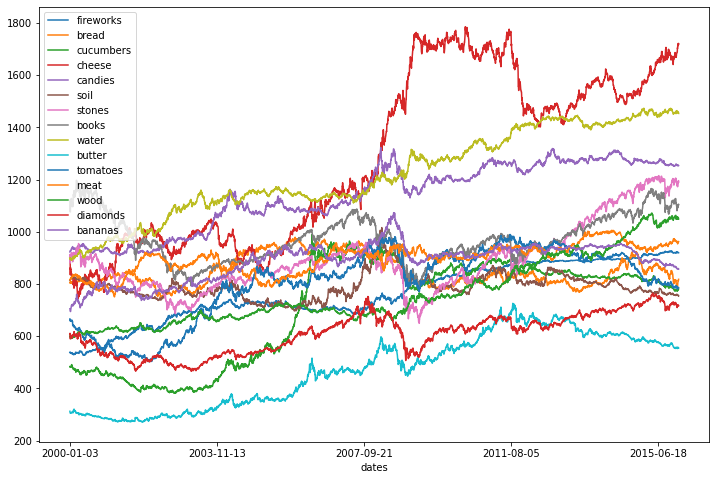

In [125]:
df.index = df.dates
df.plot(figsize=(12, 8))

In [126]:
from sklearn.covariance import ShrunkCovariance

In [128]:
prices = df.drop(columns = 'dates')
returns = prices.diff()
returns.cov()

,fireworks,bread,cucumbers,cheese,candies,soil,stones,books,water,butter,tomatoes,meat,wood,diamonds,bananas
fireworks,2.493730,-0.393812,-0.564134,-0.173445,-0.486503,-0.385366,-2.633630,-2.294358,3.889117,0.289971,0.640411,-0.038604,1.697066,-0.628058,-0.373389
bread,-0.393812,7.973990,0.774488,-0.086964,0.380923,0.152905,1.453644,1.960136,-0.730009,0.472370,0.719904,0.234266,-0.558934,0.872133,0.785131
cucumbers,-0.564134,0.774488,13.333998,1.547841,2.353194,2.099706,3.620329,5.149496,-1.199334,4.916483,4.033732,0.151642,-1.124639,2.457930,2.618377
cheese,-0.173445,-0.086964,1.547841,51.020013,0.907930,1.042205,1.063331,1.603954,-0.079527,0.711148,0.406308,6.016680,-0.207735,1.027048,1.002080
candies,-0.486503,0.380923,2.353194,0.907930,11.075169,6.375967,2.033386,2.412536,-1.122161,2.804461,3.079302,0.154000,-0.811906,1.272516,2.558900
soil,-0.385366,0.152905,2.099706,1.042205,6.375967,11.854015,1.749892,1.683361,-1.013751,2.522342,2.657353,0.273103,-0.571928,0.744058,2.160026
stones,-2.633630,1.453644,3.620329,1.063331,2.033386,1.749892,26.571940,13.998280,-5.284479,1.220072,3.187207,0.310430,-3.034537,3.412815,1.912442
books,-2.294358,1.960136,5.149496,1.603954,2.412536,1.683361,13.998280,24.950920,-4.532589,1.847750,2.902400,0.431302,-4.175871,6.285425,2.369128
water,3.889117,-0.730009,-1.199334,-0.079527,-1.122161,-1.013751,-5.284479,-4.532589,9.131507,0.337342,1.034770,-0.040315,4.042912,-1.137048,-0.983232
butter,0.289971,0.472370,4.916483,0.711148,2.804461,2.522342,1.220072,1.847750,0.337342,9.762140,5.637602,-0.043716,0.162229,1.353354,2.717951


In [88]:
prices = df.drop(columns = ['dates'])

In [92]:
cov = ShrunkCovariance().fit(prices)
cov.covariance_


array([[ 1.28694601e+04, -6.88990659e+02,  1.32791469e+04,
         2.76103808e+04,  1.15945543e+04,  9.72505639e+02,
         7.07941065e+03, -8.63555258e+01,  1.60978082e+04,
         1.20728267e+04,  1.05147267e+04,  4.09749076e+03,
         1.14824086e+04,  5.17292762e+03,  4.73762745e+03],
       [-6.88990659e+02,  5.03180937e+03,  2.41254043e+03,
        -4.64533746e+03,  3.05625157e+02, -6.69863639e+02,
         1.05730684e+03,  7.59376128e+02, -9.17906563e+02,
        -4.80816729e+02,  1.77512658e+03, -5.46894407e+02,
        -7.05988292e+02,  7.41598544e+02,  1.33624315e+03],
       [ 1.32791469e+04,  2.41254043e+03,  3.69866564e+04,
         4.38161572e+04,  1.87725524e+04,  3.48101118e+03,
         1.04648160e+04,  3.62726686e+03,  2.03799225e+04,
         2.11055937e+04,  2.12606655e+04,  6.16914449e+03,
         1.27387537e+04,  1.12412897e+04,  1.04179081e+04],
       [ 2.76103808e+04, -4.64533746e+03,  4.38161572e+04,
         9.66498386e+04,  3.12872097e+04,  5.49111858

In [101]:
def cov_shrunk(df):
    prices = df.drop(columns = ['dates'])
    cov = ShrunkCovariance().fit(prices)
    return cov.covariance_
    

In [115]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

In [116]:
mu = mean_historical_return(prices)

In [119]:
mu = mean_historical_return(prices)
S = CovarianceShrinkage(prices).ledoit_wolf()

In [120]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'fireworks': 0.47038, 'bread': 0.0, 'cucumbers': 0.08303, 'cheese': 0.1229, 'candies': 0.0, 'soil': 0.0, 'stones': 0.04477, 'books': 0.0, 'water': 0.0, 'butter': 0.03275, 'tomatoes': 0.0, 'meat': 0.0, 'wood': 0.24616, 'diamonds': 0.0, 'bananas': 0.0}


In [121]:
ef.portfolio_performance(verbose=True)


Expected annual return: 3.3%
Annual volatility: 2.7%
Sharpe Ratio: 0.49


(0.03336669046034498, 0.02741675609798887, 0.4875372714617205)

In [73]:
#df.set_index('dates', inplace = True)
covariances = df.rolling(window_size).cov().shift(-1)

In [74]:
covariances

diamonds     butter       cars  cucumber     bananas
dates                                                                     
2000-01-03 diamonds        NaN        NaN        NaN       NaN         NaN
           butter          NaN        NaN        NaN       NaN         NaN
           cars            NaN        NaN        NaN       NaN         NaN
           cucumber        NaN        NaN        NaN       NaN         NaN
           bananas         NaN        NaN        NaN       NaN         NaN
...                        ...        ...        ...       ...         ...
2023-01-11 diamonds  -5.163189   8.561106  -3.094908 -0.048476  -19.975061
           butter     3.234504  -3.094908   9.442978 -2.922378   24.304182
           cars       0.119109  -0.048476  -2.922378  2.048404   -5.256726
           cucumber  17.197157 -19.975061  24.304182 -5.256726  103.182083
           bananas         NaN        NaN        NaN       NaN         NaN

[29780 rows x 5 columns]

In [79]:
matrices = []
for date, new_df in covariances.reset_index(level=[0,1]).groupby('dates'):
    new_df.drop(columns=new_df.columns[0], axis=1, inplace=True)
    matrices.append(new_df)

In [81]:
matrices[20]

,level_1,diamonds,butter,cars,cucumber,bananas
100,diamonds,5.023594,26.084252,-4.726212,-5.709971,-41.720426
101,butter,-1.603819,-4.726212,6.661015,1.690353,12.778121
102,cars,-1.433886,-5.709971,1.690353,2.140051,12.003563
103,cucumber,-9.097326,-41.720426,12.778121,12.003563,97.870989
104,bananas,3.126225,5.237453,-1.504226,-1.590827,-11.580647


In [78]:
len(matrices)

5956

In [38]:
covariances.reset_index(level=[0,1])

,dates,level_1,diamonds,butter,cars,cucumber,bananas
0,2000-01-03,diamonds,NaN,NaN,NaN,NaN,NaN
1,2000-01-03,butter,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,cars,NaN,NaN,NaN,NaN,NaN
3,2000-01-03,cucumber,NaN,NaN,NaN,NaN,NaN
4,2000-01-03,bananas,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
29775,2023-01-11,diamonds,4.562624,-5.163189,3.234504,0.119109,17.197157
29776,2023-01-11,butter,-5.163189,8.561106,-3.094908,-0.048476,-19.975061
29777,2023-01-11,cars,3.234504,-3.094908,9.442978,-2.922378,24.304182
29778,2023-01-11,cucumber,0.119109,-0.048476,-2.922378,2.048404,-5.256726


# GARCH Covariance Estimate

In [2]:
import pandas as pd
df = pd.read_csv('hackathon_prices_dev.csv')

In [3]:
prices = df.set_index('dates')
returns = prices.diff()

In [4]:
returns

,fireworks,bread,cucumbers,cheese,candies,soil,stones,books,water,butter,tomatoes,meat,wood,diamonds,bananas
dates,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.54,-1.83,-2.80,-1.19,2.35,0.51,-24.07,-23.33,3.59,-4.35,-5.12,-0.25,-3.77,1.83,-2.43
2000-01-05,-2.03,-1.05,1.46,-16.05,2.09,1.03,-0.54,-18.57,-4.57,-2.25,0.61,1.22,-1.44,-13.46,-4.10
2000-01-06,1.02,3.36,0.50,-48.82,-0.31,-0.37,-7.50,-3.21,2.72,-0.50,-4.17,-2.53,-1.03,-8.09,-0.68
2000-01-07,1.29,3.04,0.81,28.31,1.02,2.03,21.09,16.22,2.52,0.37,-0.23,1.95,3.94,2.60,-3.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,0.24,6.79,2.34,5.96,-0.86,-0.35,4.32,10.74,-1.37,-0.66,1.19,1.75,-2.54,2.15,1.51
2015-12-24,0.00,0.00,0.00,-0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.97,0.00,-0.81,0.00
2015-12-28,-0.16,1.76,0.00,4.35,-2.18,-0.91,-0.27,-3.12,2.24,-0.14,1.18,1.96,3.65,-1.12,-0.80


In [6]:
from arch import arch_model
am = arch_model(returns.fireworks[1::])

In [7]:
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 11281184.460289426
Iteration:      2,   Func. Count:     15,   Neg. LLF: 7914.607518086472
Iteration:      3,   Func. Count:     21,   Neg. LLF: 7093.958769000867
Iteration:      4,   Func. Count:     26,   Neg. LLF: 25288.07858516079
Iteration:      5,   Func. Count:     34,   Neg. LLF: 12453.695090182135
Iteration:      6,   Func. Count:     40,   Neg. LLF: 7087.235938246893
Iteration:      7,   Func. Count:     46,   Neg. LLF: 7084.182412071168
Iteration:      8,   Func. Count:     51,   Neg. LLF: 7084.153776895281
Iteration:      9,   Func. Count:     56,   Neg. LLF: 7084.15367307612
Iteration:     10,   Func. Count:     61,   Neg. LLF: 7084.152538209075
Iteration:     11,   Func. Count:     66,   Neg. LLF: 7128.225521295444
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7084.15253814826
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 11

In [8]:
res

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              fireworks   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7084.15
Distribution:                  Normal   AIC:                           14176.3
Method:            Maximum Likelihood   BIC:                           14201.6
                                        No. Observations:                 4138
Date:                Sat, Apr 01 2023   Df Residuals:                     4137
Time:                        11:13:30   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0348  1.622e-02      2.145  3.196e-02 [3.

In [10]:
pip install mgarch

Note: you may need to restart the kernel to use updated packages.


In [12]:
import mgarch

In [13]:
vol = mgarch.mgarch()

In [ ]:
vol.fit(returns)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [11]:
import mgarch
vol = mgarch.mgarch()
vol.fit(returns)
ndays = 10 # volatility of nth day
cov_nextday = vol.predict(ndays)

KeyboardInterrupt: 